In [119]:
import pandas as pd
CBTN_X01 = pd.read_csv("CBTN-X01_biosample_table.csv")
current_cohort = pd.read_excel("Supplementary Tables.xlsx", "2. Biosamples")
df = pd.concat([current_cohort, CBTN_X01])
# df = pd.read_csv("biosample_table.csv")
# Assuming df is your DataFrame with 'ecDNA_sequences_detected' column and indexed by 'biosample_id'
total_unique_samples = len(df)
ecDNA_positive_samples = len(df[df['ecDNA_sequences_detected'] > 0.0])
fraction_ecDNA_positive = ecDNA_positive_samples / total_unique_samples

print("Total Unique Samples:", total_unique_samples)
print("EcDNA Positive Samples:", ecDNA_positive_samples)
print("Fraction of ecDNA Positive Samples:", fraction_ecDNA_positive)
biosamples = df
biosamples.rename(columns={"Unnamed: 0": "biosample_id"}, inplace=True)

# biosamples = biosamples.set_index("biosample_id")
biosamples.head()

Total Unique Samples: 3205
EcDNA Positive Samples: 274
Fraction of ecDNA Positive Samples: 0.08549141965678628


,biosample_id,sex,patient_id,external_sample_id,tumor_history,age_at_diagnosis,cohort,extent_of_tumor_resection,cancer_type,cancer_subclass,ecDNA_sequences_detected,amplicon_class,in_unique_tumor_set,in_unique_patient_set,Kids_First_Biospecimen_ID,cancer_subtype,source_ontology
0,BS_AQMKA8NC,Male,PT_00G007DM,7316-2577,Recurrence,3178.0,PBTA-X00,Gross/Near total resection,ETMR,NaN,0.0,No amplification,False,False,NaN,NaN,NaN
1,BS_K07KNTFY,Male,PT_00G007DM,7316-272,Diagnosis,464.0,PBTA-X00,Gross/Near total resection,ETMR,NaN,1.0,ecDNA,True,True,NaN,NaN,NaN
2,BS_TE8QFF7T,Male,PT_01MZ62KG,7316-447,Progressive,546.0,PBTA-X00,Partial resection,ETMR,NaN,1.0,ecDNA,True,True,NaN,NaN,NaN
3,BS_2VB8649B,Male,PT_02J5CWN5,7316-2989,Diagnosis,2223.0,PBTA-X00,Partial resection,LGG,FGFR,0.0,No amplification,False,False,NaN,NaN,NaN
4,BS_5TT6TT4K,Male,PT_02J5CWN5,7316-898,Progressive,3722.0,PBTA-X00,Partial resection,LGG,MAPK,0.0,No amplification,True,True,NaN,NaN,NaN


In [120]:
# How many unique tumor types?
print(f"Number of tumor types: {len(biosamples.cancer_type.unique())}")

# How many tumor types with >=n biosamples?
n=5
tmp = biosamples
gby = tmp.groupby("cancer_type").count().ecDNA_sequences_detected
print(f"Number of tumor types with >= {n} tumors: {len(gby[gby >=n])}")

# How many tumor types with ecDNA?
ect = biosamples[biosamples.ecDNA_sequences_detected > 0.0].cancer_type.unique()
print(f"Number of tumor types with ecDNA: {len(ect)}")
print(f"Tumor types with ecDNA: {', '.join(ect)}")

# How many tumor types with >=4 biosamples and ecDNA?
ect = set(ect)
m = set(gby[gby >= n].index)
print(f"Number of tumor types with ecDNA and >= {n} tumors: {len(ect & m)}")

# Which ecDNA+ tumors are excluded when we set an n threshold?
print(f"ecDNA+ tumors with fewer than {n} unique biosamples: {', '.join(ect - m)}")

Number of tumor types: 49
Number of tumor types with >= 5 tumors: 35
Number of tumor types with ecDNA: 20
Tumor types with ecDNA: ETMR, HGG, RMS, EPN, GNT, CPT, MBL, MPNST, PBL, NBL, MST, CPG, OST, LGG, RBL, ACC, WLM, SARC, GCT, EMBT
Number of tumor types with ecDNA and >= 5 tumors: 20
ecDNA+ tumors with fewer than 5 unique biosamples: 


In [121]:
bb = biosamples[(biosamples.ecDNA_sequences_detected > 0.0)]
n_ecDNA_samples = len(bb)
print(f"Number of ecDNA+ samples: {n_ecDNA_samples}")

n_ecDNA_patients = len(bb.patient_id.unique())
print(f"Number of ecDNA+ patients: {n_ecDNA_patients}")

Number of ecDNA+ samples: 274
Number of ecDNA+ patients: 227


In [122]:
len(biosamples[(biosamples.cancer_type == "OST") & (biosamples.ecDNA_sequences_detected > 0.0)])
print(len(biosamples.patient_id.unique()))
print(len(biosamples.biosample_id.unique()))

2578
3179


In [123]:
ct = pd.crosstab(biosamples.cancer_type, biosamples.ecDNA_sequences_detected > 0)
ct['Total'] = ct.apply(sum,axis='columns')
ct.sort_values('Total',ascending=False,inplace=True)
ct.rename(columns={False:'no ecDNA',True:'ecDNA'},inplace=True)
ct.head(40)

ecDNA_sequences_detected,no ecDNA,ecDNA,Total
cancer_type,,,
LGG,624,1,625
HGG,439,99,538
MBL,318,51,369
EPN,214,3,217
GNT,204,1,205
BENG,170,0,170
NBL,90,35,125
CPG,113,1,114
ATRT,98,0,98


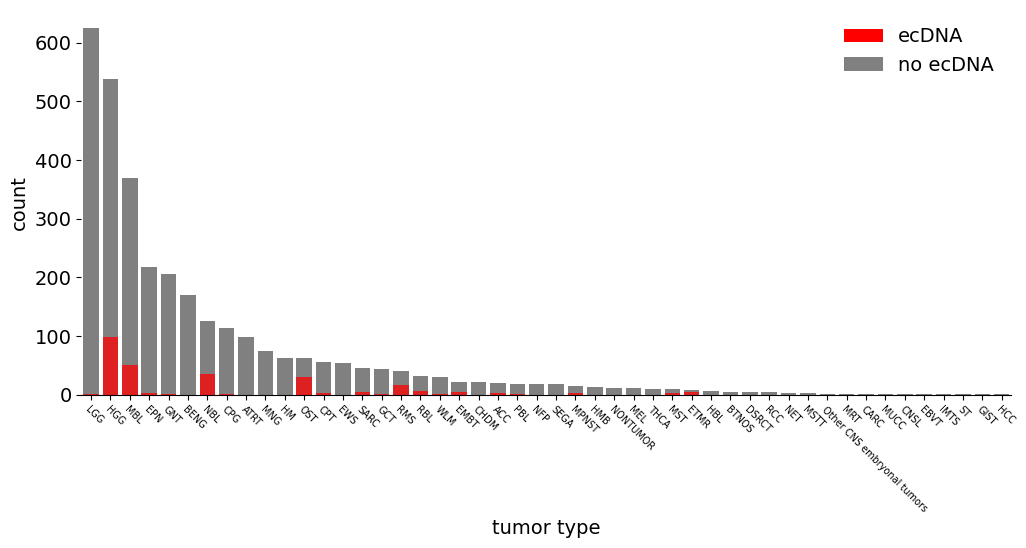

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
def all_tumors_x_ecDNA_stacked_barplot(ct, svgfile=None):
    cats = ['ecDNA','no ecDNA']
    colors={'ecDNA':'red','no ecDNA':'grey'}

    # legend
    plt.figure(figsize=(12,5))
    l = plt.legend(handles=[plt.Rectangle((0,0),1,1,fc=colors[c],edgecolor='none') for c in cats],
                  labels=cats, loc='upper right',frameon=False,ncol=1,prop={'size':14})
    # plot
    p=recursive_stacked_barplot(ct,cats,colors)
    # axes
    sns.despine(left=True)
    p.set_xticklabels(p.get_xticklabels(), rotation=-45,horizontalalignment='left',rotation_mode="anchor")
    p.set_xlabel("tumor type")
    p.set_ylabel("count")
    #p.set_ylim(0,20)
    #p.set_yticks(range(0,20,5))
    for item in ([p.xaxis.label, p.yaxis.label] +
            p.get_yticklabels()):
        item.set_fontsize(14)
    for item in p.get_xticklabels():
        item.set_fontsize(7)
    # save
    if svgfile != None:
        plt.savefig(svgfile)


def recursive_stacked_barplot(df,cats,colors):
    if len(cats) == 0:
        pass
    else:
        # make barplot
        df = df[cats]
        y = df.apply(sum,axis='columns')
        p=sns.barplot(x = df.index, y=y, color=colors[cats[-1]])
        # recurse
        recursive_stacked_barplot(df,cats[:-1],colors)
        return p
    
## This plot has too many tumor types to be very readable but shows that we have a long tail of tumor types, and the long tail is ecDNA-.
all_tumors_x_ecDNA_stacked_barplot(ct)

In [125]:
def fraction_ecDNA(cancer_type):
    tmp = biosamples
    tmp = tmp[tmp.cancer_type == cancer_type]
    a=len(tmp[tmp.ecDNA_sequences_detected > 0])
    b=len(tmp)
    print(f"{a}/{b}, {a/b*100}%")
fraction_ecDNA('LGG')
biosamples[(biosamples.cancer_type=='LGG') & (biosamples.ecDNA_sequences_detected > 0.0)]

1/625, 0.16%


,biosample_id,sex,patient_id,external_sample_id,tumor_history,age_at_diagnosis,cohort,extent_of_tumor_resection,cancer_type,cancer_subclass,ecDNA_sequences_detected,amplicon_class,in_unique_tumor_set,in_unique_patient_set,Kids_First_Biospecimen_ID,cancer_subtype,source_ontology
1056,SJLGG040_D,Female,SJ003240,NaN,Diagnosis,2783.0,SJC-DS-1001,NaN,LGG,NOS,1.0,ecDNA,True,True,NaN,NaN,NaN


In [126]:
fraction_ecDNA('HGG')

99/538, 18.401486988847584%


In [127]:
fraction_ecDNA('MBL')

51/369, 13.821138211382115%


In [128]:
fraction_ecDNA('NBL')

35/125, 28.000000000000004%


In [129]:
fraction_ecDNA('PBL')

1/19, 5.263157894736842%


In [130]:
fraction_ecDNA('EPN')
biosamples[(biosamples.cancer_type=='EPN') & (biosamples.ecDNA_sequences_detected > 0.0)]

3/217, 1.3824884792626728%


,biosample_id,sex,patient_id,external_sample_id,tumor_history,age_at_diagnosis,cohort,extent_of_tumor_resection,cancer_type,cancer_subclass,ecDNA_sequences_detected,amplicon_class,in_unique_tumor_set,in_unique_patient_set,Kids_First_Biospecimen_ID,cancer_subtype,source_ontology
132,BS_B4P1NP87,NaN,PT_3VCS1PPF,7316-198,Diagnosis,4710.0,PBTA-X00,Partial resection,EPN,MYCN,1.0,ecDNA,False,False,NaN,NaN,NaN
133,BS_QMY84KF4,NaN,PT_3VCS1PPF,7316-490,Progressive,5233.0,PBTA-X00,Partial resection,EPN,MYCN,1.0,ecDNA,True,True,NaN,NaN,NaN
641,BS_9GJHMA3J,Male,PT_MT27S7S4,7316-1969,Diagnosis,7177.0,PBTA-X00,Partial resection,EPN,NOS,1.0,ecDNA,True,True,NaN,NaN,NaN


In [131]:
fraction_ecDNA('OST')

30/62, 48.38709677419355%


In [132]:
fraction_ecDNA('RMS')

17/41, 41.46341463414634%


In [133]:
fraction_ecDNA('RBL')

6/32, 18.75%


In [134]:
fraction_ecDNA('ACC')

3/20, 15.0%


In [135]:
fraction_ecDNA('CPG')

1/114, 0.8771929824561403%


In [136]:
fraction_ecDNA('GNT')

1/205, 0.4878048780487805%


In [137]:
fraction_ecDNA('ETMR')

4/8, 50.0%


In [138]:
fraction_ecDNA('SARC')
fraction_ecDNA('MST')
fraction_ecDNA('GCT')
fraction_ecDNA('CPT')
fraction_ecDNA('WLM')

5/46, 10.869565217391305%
3/10, 30.0%
2/44, 4.545454545454546%
3/56, 5.357142857142857%
1/30, 3.3333333333333335%


In [139]:
fraction_ecDNA('EWS')

0/54, 0.0%


In [140]:
fraction_ecDNA('BENG')

0/170, 0.0%


In [141]:
biosamples[biosamples.cancer_type == 'MPNST']

,biosample_id,sex,patient_id,external_sample_id,tumor_history,age_at_diagnosis,cohort,extent_of_tumor_resection,cancer_type,cancer_subclass,ecDNA_sequences_detected,amplicon_class,in_unique_tumor_set,in_unique_patient_set,Kids_First_Biospecimen_ID,cancer_subtype,source_ontology
76,BS_6Z213H2V,NaN,PT_2E552BAR,7316-3066,Progressive,7300.0,PBTA-X00,Partial resection,MPNST,NaN,0.0,No amplification,True,True,NaN,NaN,NaN
294,BS_WH8KWW5J,Male,PT_9PJR0ZK7,7316-2576,Recurrence,6879.0,PBTA-X00,Partial resection,MPNST,NaN,1.0,ecDNA,False,False,NaN,NaN,NaN
295,BS_A1DV9T7G,Male,PT_9PJR0ZK7,7316-935,Progressive,6431.0,PBTA-X00,Partial resection,MPNST,NaN,2.0,ecDNA,True,True,NaN,NaN,NaN
725,BS_Z1BBZ01F,NaN,PT_QQ9JGEY9,7316-356,Diagnosis,6349.0,PBTA-X00,Partial resection,MPNST,NaN,0.0,No amplification,True,True,NaN,NaN,NaN
1281,SJMPNST030013_D1,NaN,SJ030013,NaN,Diagnosis,NaN,SJC-DS-1003,NaN,MPNST,NaN,0.0,No amplification,True,True,NaN,NaN,NaN
13,BS_091H6TKY,NaN,PT_XWYNQBTK,7316-2579,Diagnosis,8297.0,PBTA-X01,NaN,MPNST,NaN,0.0,NaN,NaN,NaN,NaN,Malignant peripheral nerve sheath tumor (MPNST),disease_type
190,BS_3YGQ4RZ6,Male,PT_SY6W6B0Z,7316-9067,Progressive,6548.0,PBTA-X01,NaN,MPNST,NaN,0.0,NaN,NaN,NaN,BS_6SE44NVP,Malignant peripheral nerve sheath tumor (MPNST),harmonized_diagnosis
355,BS_7FS8J1GH,Male,PT_SY6W6B0Z,7316-8527,Diagnosis,6118.0,PBTA-X01,Gross/Near total resection,MPNST,NaN,0.0,NaN,NaN,NaN,BS_3ZGXMCJS,Malignant peripheral nerve sheath tumor (MPNST),harmonized_diagnosis
406,BS_8M3TJFPF,Male,PT_SY6W6B0Z,7316-9067,Progressive,6548.0,PBTA-X01,NaN,MPNST,NaN,0.0,NaN,NaN,NaN,BS_6SE44NVP,Malignant peripheral nerve sheath tumor (MPNST),harmonized_diagnosis
575,BS_C5AMH7AC,Male,PT_SY6W6B0Z,7316-9067,Progressive,6548.0,PBTA-X01,NaN,MPNST,NaN,0.0,NaN,NaN,NaN,BS_6SE44NVP,Malignant peripheral nerve sheath tumor (MPNST),harmonized_diagnosis
